 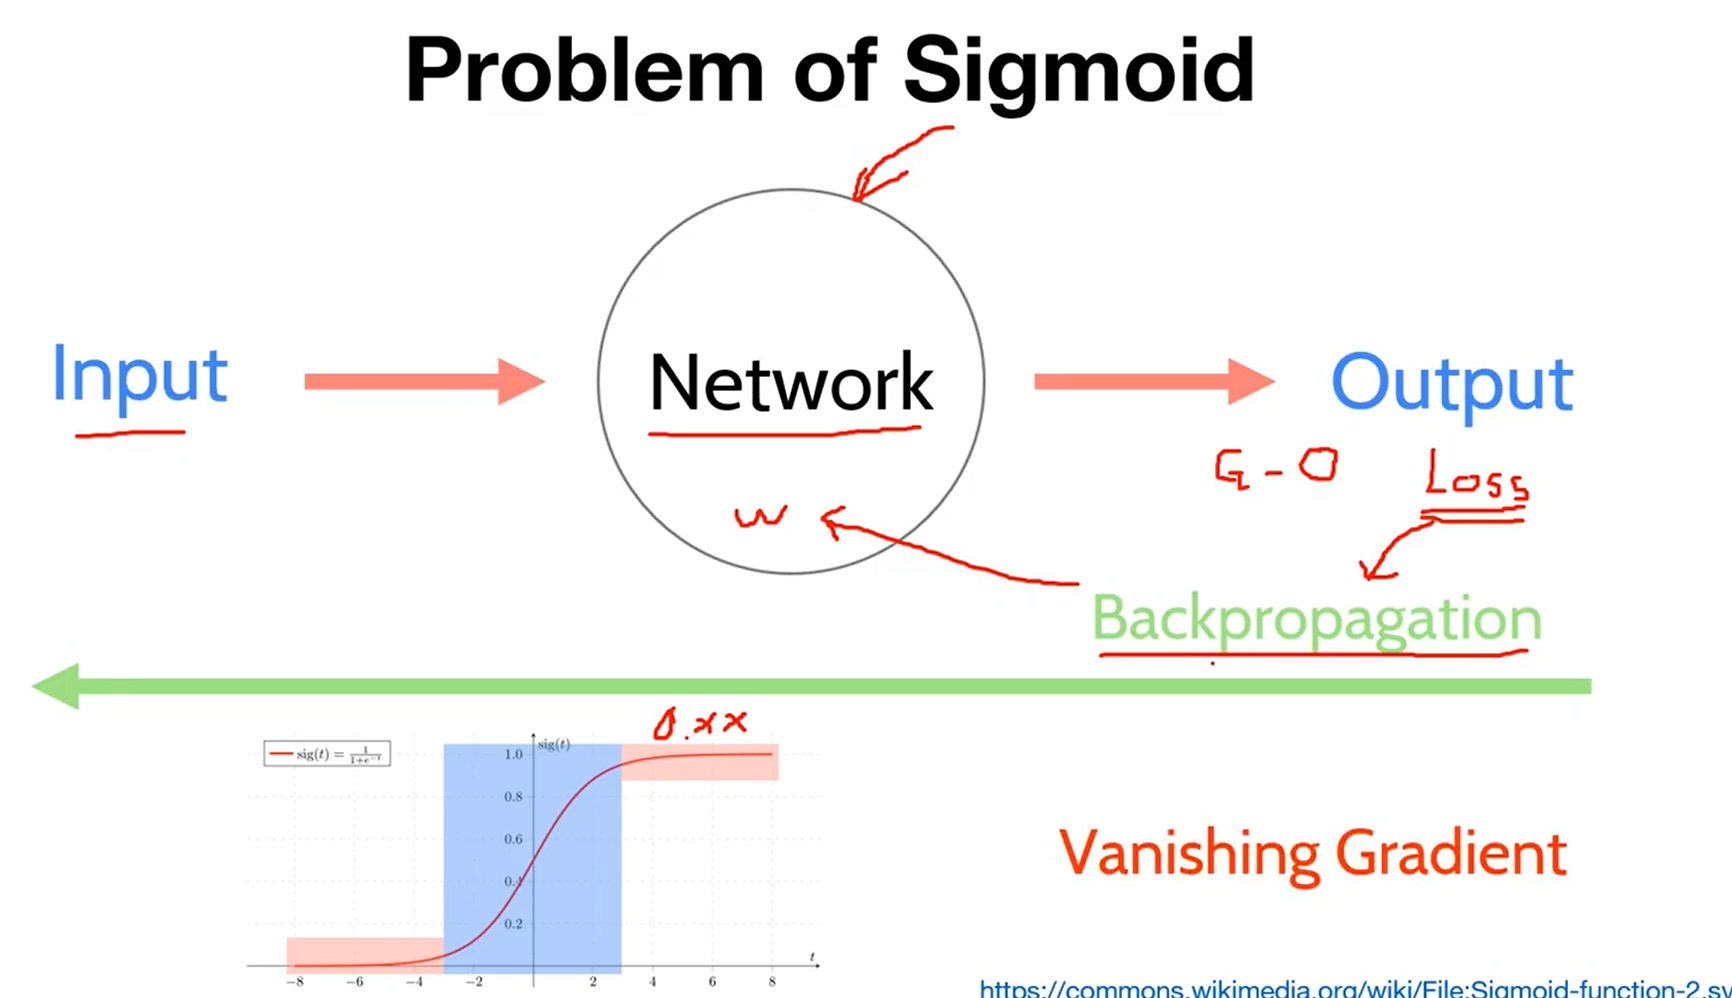
 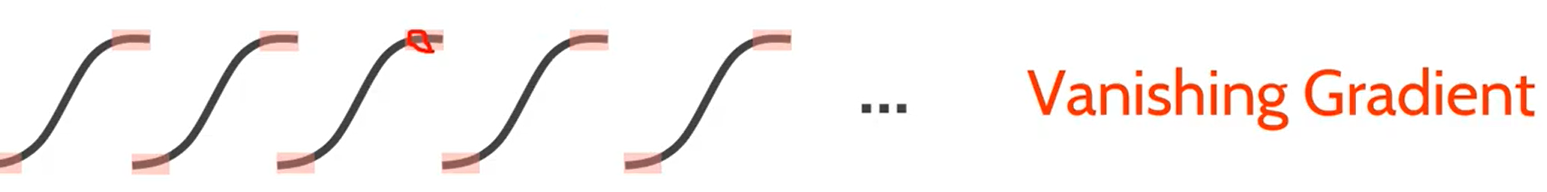

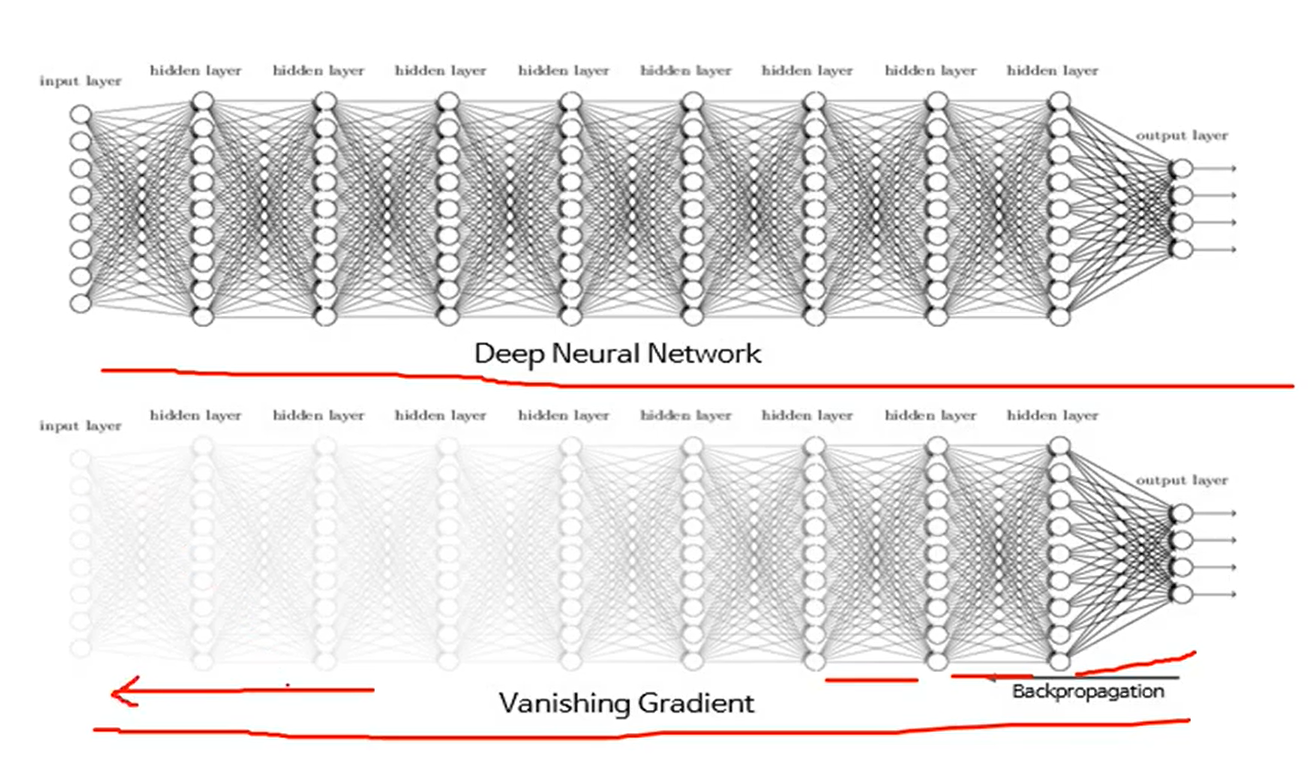

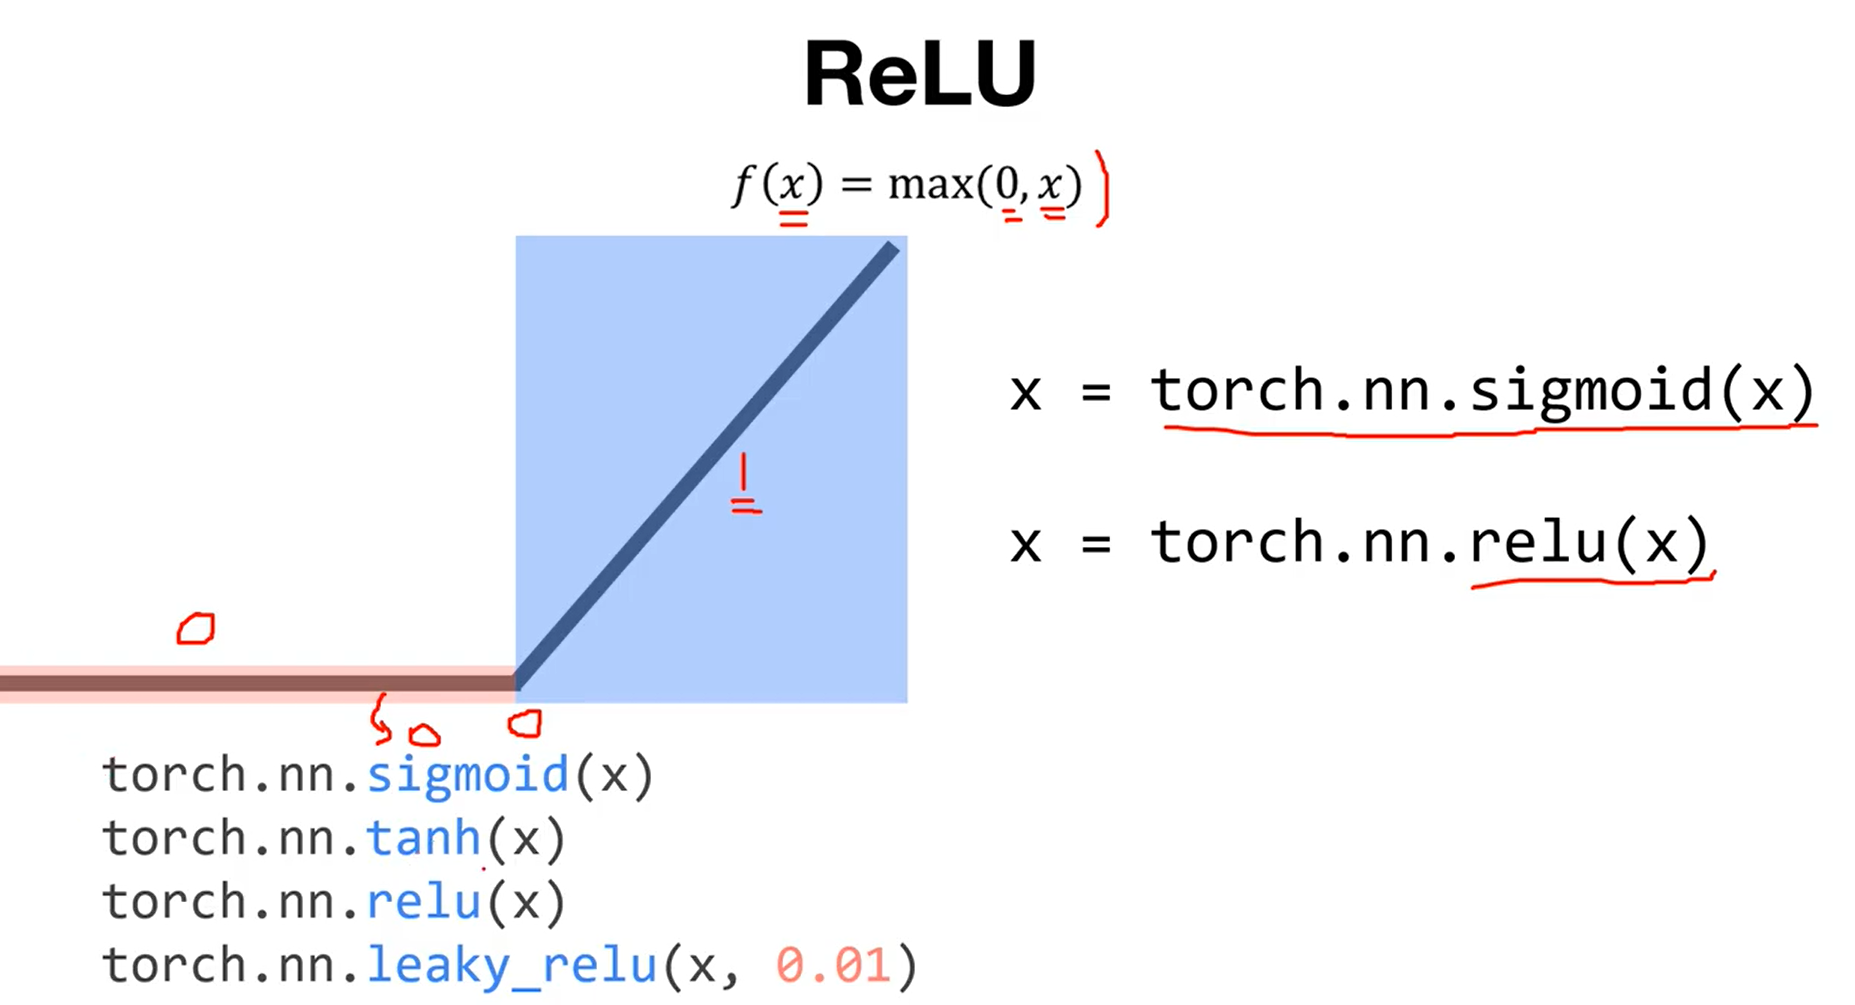

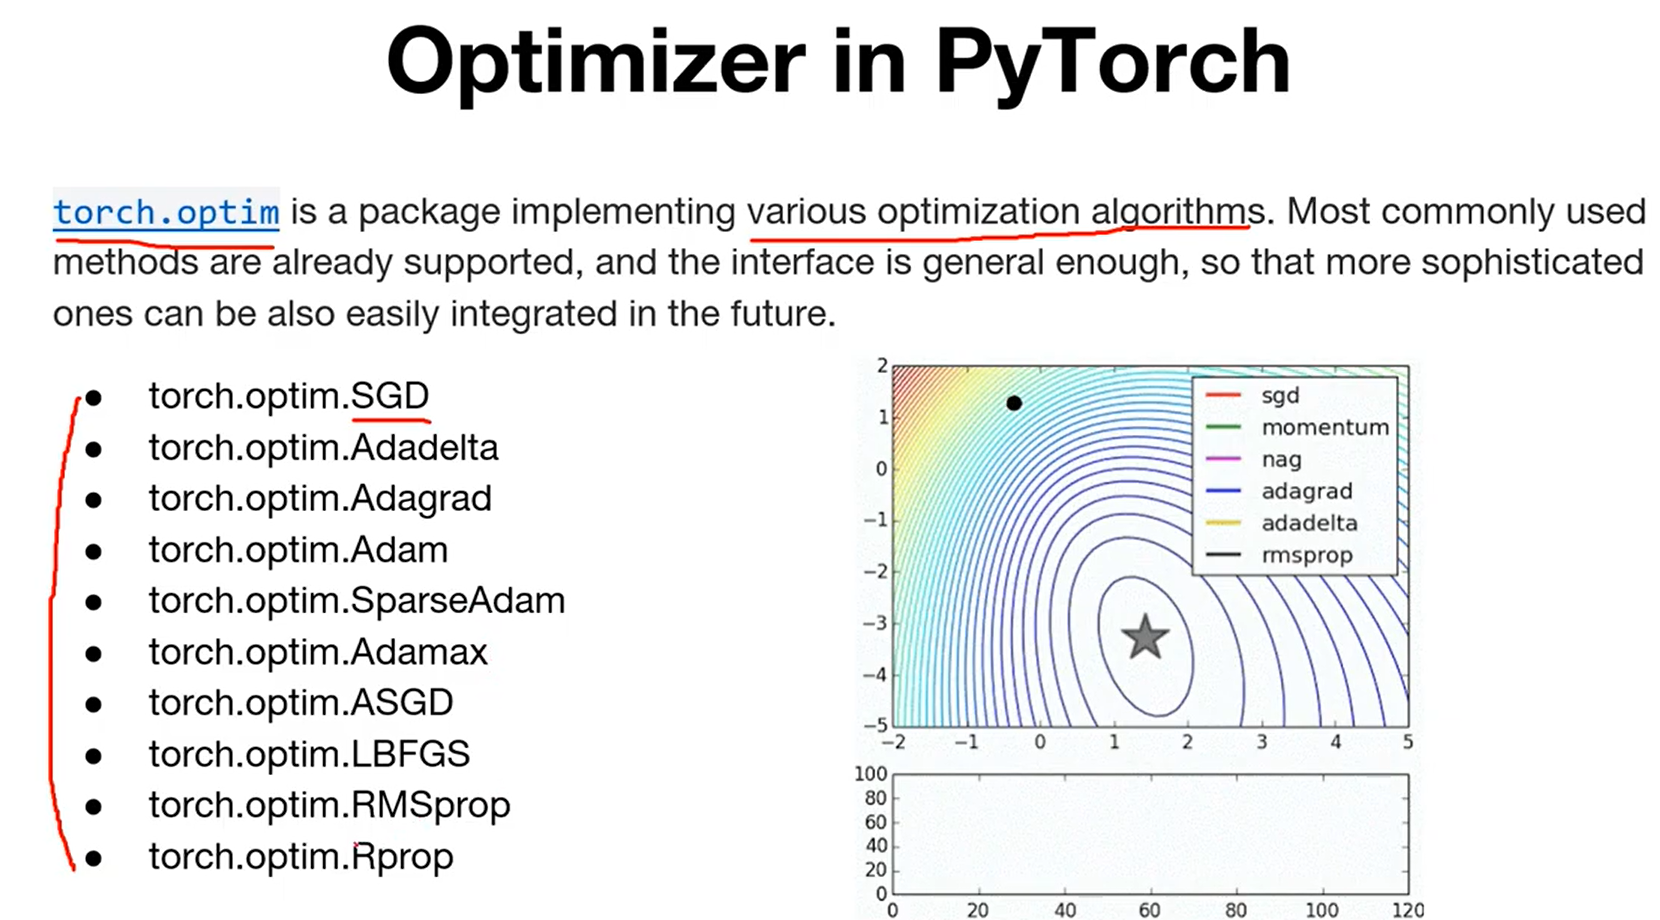

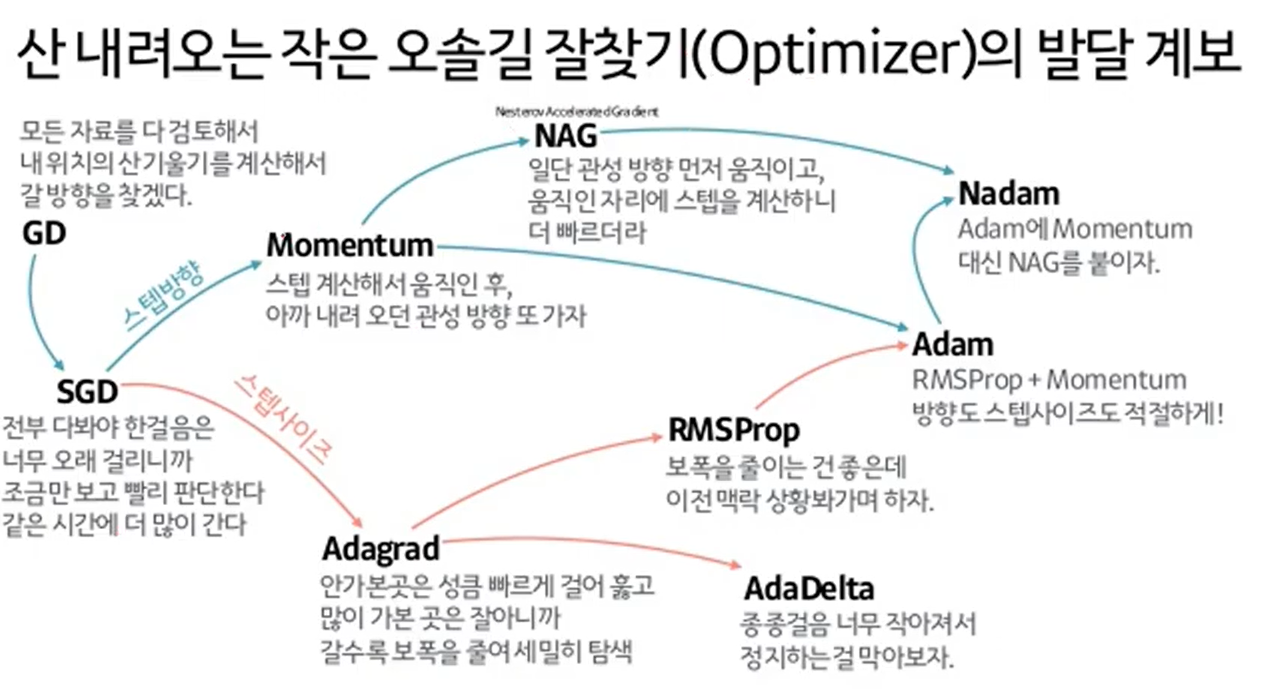

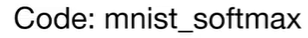

In [17]:
import torch 
import torchvision.datasets as dsets
import torchvision.transforms as transforms
import random

device = 'cuda' if torch.cuda.is_available() else 'cpu'

#for reproducibility
random.seed(777)
torch.manual_seed(777) 
if device == 'cuda':
    torch.cuda.manual_seed_all(777)

#parameters
learning_rate = 0.001
traning_epochs = 15
batch_size = 100

#MNIST dataset
mnist_train = dsets.MNIST(root='MNIST_data/',
                          train=True,
                          
                          transform=transforms.ToTensor(),
                          download=True)

mnist_test = dsets.MNIST(root='MNIST_data/',
                         train=False,
                         transform=transforms.ToTensor(),
                         download=True)

#dataset loader
data_loader = torch.utils.data.DataLoader(dataset=mnist_train,
                                          batch_size=batch_size,
                                          shuffle=True,
                                          drop_last=True)

#MNIST data image of shape 28 * 28 = 784
linear = torch.nn.Linear(784, 10, bias=True).to(device)

#initialization
torch.nn.init.normal_(linear.weight)


Parameter containing:
tensor([[-1.2901,  0.3930, -0.1891,  ..., -0.1626, -0.3275,  0.5608],
        [-1.6757, -0.2454,  0.9221,  ...,  0.9559,  0.6160, -0.4226],
        [ 0.2444,  1.4810, -2.0906,  ...,  0.1206,  1.0044, -0.3737],
        ...,
        [ 0.6234,  1.8019, -2.7563,  ..., -0.5889, -0.5576,  0.7360],
        [-0.2871, -1.3313, -2.2248,  ...,  0.0309,  0.9180, -0.1482],
        [ 0.7678,  0.6624, -0.5362,  ...,  0.2338,  0.3688, -0.7182]],
       device='cuda:0', requires_grad=True)

In [18]:
#define cost/loss & optimizer
criterion = torch.nn.CrossEntropyLoss().to(device)      #Softmax is internally computed
optimizer = torch.optim.Adam(linear.parameters(), lr=learning_rate)         #SGD에서 Adam으로 변경

total_batch = len(data_loader)
for epoch in range(traning_epochs):
    avg_cost = 0

    for X, Y in data_loader:
        #reshape input image into [batch_size by 784]
        #label is not one-hot encoded
        X = X.view(-1, 28 * 28).to(device)
        Y = Y.to(device)

        optimizer.zero_grad()
        hypothesis = linear(X)
        cost = criterion(hypothesis, Y)
        cost.backward()
        optimizer.step()

        avg_cost += cost / total_batch

    print('Epoch:', '%04d' % (epoch + 1), 'cost =', '{:.9f}'.format(avg_cost))

print('Learning finished')

Epoch: 0001 cost = 5.645695686
Epoch: 0002 cost = 1.696827412
Epoch: 0003 cost = 1.121626616
Epoch: 0004 cost = 0.882780194
Epoch: 0005 cost = 0.748860002
Epoch: 0006 cost = 0.661943853
Epoch: 0007 cost = 0.599809647
Epoch: 0008 cost = 0.553705037
Epoch: 0009 cost = 0.517529070
Epoch: 0010 cost = 0.488772690
Epoch: 0011 cost = 0.465197265
Epoch: 0012 cost = 0.445370257
Epoch: 0013 cost = 0.428630620
Epoch: 0014 cost = 0.413612187
Epoch: 0015 cost = 0.401216000
Learning finished


In [22]:
#Test the model using test sets
with torch.no_grad():
    X_test = mnist_test.test_data.view(-1, 28 * 28).float().to(device)
    Y_test = mnist_test.test_labels.to(device)

    prediction = linear(X_test)
    correct_prediction = torch.argmax(prediction, 1) == Y_test
    accuracy = correct_prediction.float().mean()
    print('Accuracy:', accuracy.item())

    #Get one and predict
    r = random.randint(0, len(mnist_test) - 1)
    X_single_data = mnist_test.test_data[r:r + 1].view(-1, 28 * 28).float().to(device)
    Y_single_data = mnist_test.test_labels[r:r + 1].to(device)

    print('Label: ', Y_single_data.item())
    single_prediction = linear(X_single_data)
    print('Prediction: ', torch.argmax(single_prediction, 1).item())

Accuracy: 0.8894999623298645
Label:  9
Prediction:  9


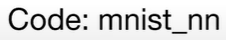

In [14]:
import torch
import torchvision.datasets as dsets
import torchvision.transforms as transforms
import random

device = 'cuda' if torch.cuda.is_available() else 'cpu'

# for reproducibility
random.seed(111)
torch.manual_seed(777)
if device == 'cuda':
    torch.cuda.manual_seed_all(777)

# parameters
learning_rate = 0.001
training_epochs = 15
batch_size = 100

# MNIST dataset
mnist_train = dsets.MNIST(root='MNIST_data/',
                          train=True,
                          transform=transforms.ToTensor(),
                          download=True)

mnist_test = dsets.MNIST(root='MNIST_data/',
                         train=False,
                         transform=transforms.ToTensor(),
                         download=True)


# dataset loader
data_loader = torch.utils.data.DataLoader(dataset=mnist_train,
                                          batch_size=batch_size,
                                          shuffle=True,
                                          drop_last=True)


# nn layers
linear1 = torch.nn.Linear(784, 256, bias=True)
linear2 = torch.nn.Linear(256, 256, bias=True)
linear3 = torch.nn.Linear(256, 10, bias=True)
relu = torch.nn.ReLU()


# Initialization
torch.nn.init.normal_(linear1.weight)
torch.nn.init.normal_(linear2.weight)
torch.nn.init.normal_(linear3.weight)

Parameter containing:
tensor([[-0.6645,  0.6646,  0.7159,  ..., -0.3040, -0.8945, -0.7977],
        [-1.2045,  2.4545, -1.8073,  ..., -1.7139, -0.0451,  0.3864],
        [ 0.3414,  0.3114, -1.9218,  ..., -0.4525, -0.6849,  0.9663],
        ...,
        [ 1.3915, -0.4048,  0.2338,  ..., -0.8257, -0.8397,  1.9816],
        [ 1.0414,  0.2130, -0.0417,  ...,  1.7541, -0.6454, -0.0821],
        [-0.1162, -1.2692,  0.8201,  ..., -0.8303, -0.5022,  0.0583]],
       requires_grad=True)

In [15]:
# model
model = torch.nn.Sequential(linear1, relu, linear2, relu, linear3).to(device)


# define cost/loss & optimizer
criterion = torch.nn.CrossEntropyLoss().to(device)    # Softmax is internally computed.
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)


total_batch = len(data_loader)
for epoch in range(training_epochs):
    avg_cost = 0

    for X, Y in data_loader:
        # reshape input image into [batch_size by 784]
        # label is not one-hot encoded
        X = X.view(-1, 28 * 28).to(device)
        Y = Y.to(device)

        optimizer.zero_grad()
        hypothesis = model(X)
        cost = criterion(hypothesis, Y)
        cost.backward()
        optimizer.step()

        avg_cost += cost / total_batch

    print('Epoch:', '%04d' % (epoch + 1), 'cost =', '{:.9f}'.format(avg_cost))

print('Learning finished')

Epoch: 0001 cost = 128.835144043
Epoch: 0002 cost = 35.921123505
Epoch: 0003 cost = 23.100566864
Epoch: 0004 cost = 16.102916718
Epoch: 0005 cost = 11.638249397
Epoch: 0006 cost = 8.482009888
Epoch: 0007 cost = 6.422446728
Epoch: 0008 cost = 4.801578999
Epoch: 0009 cost = 3.589779615
Epoch: 0010 cost = 2.816181421
Epoch: 0011 cost = 2.128508806
Epoch: 0012 cost = 1.637578726
Epoch: 0013 cost = 1.316874385
Epoch: 0014 cost = 1.070448756
Epoch: 0015 cost = 0.838283837
Learning finished


In [16]:
# Test the model using test sets
with torch.no_grad():
    X_test = mnist_test.test_data.view(-1, 28 * 28).float().to(device)
    Y_test = mnist_test.test_labels.to(device)

    prediction = model(X_test)
    correct_prediction = torch.argmax(prediction, 1) == Y_test
    accuracy = correct_prediction.float().mean()
    print('Accuracy:', accuracy.item())

    # Get one and predict
    r = random.randint(0, len(mnist_test) - 1)
    X_single_data = mnist_test.test_data[r:r + 1].view(-1, 28 * 28).float().to(device)
    Y_single_data = mnist_test.test_labels[r:r + 1].to(device)

    print('Label: ', Y_single_data.item())
    single_prediction = model(X_single_data)
    print('Prediction: ', torch.argmax(single_prediction, 1).item())

Accuracy: 0.9453999996185303
Label:  9
Prediction:  9
